In [512]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import random
import time
from sklearn.metrics import accuracy_score
import sklearn

In [513]:
data=(pd.read_csv("/home/pi1grupo4/bmv100xyzepar.csv")).drop(['NHOLES'],axis=1)
data.head()

,XC,YC,ZC,NSAMP,PASS,DISTNEAR,ESTVAR,BE,CLASS_QP
0,128720.5,232510.10,3005.5,8.0,3.0,50.242311,0.394184,0.013384,2
1,128720.5,232510.15,3006.5,8.0,3.0,50.504265,0.396241,0.013369,2
2,128720.5,232510.25,3007.5,8.0,5.0,50.754825,204.990842,11.528859,2
3,128720.5,232510.25,3008.5,8.0,3.0,51.083045,0.399827,0.013313,2
4,128719.5,232510.00,3018.5,8.0,5.0,56.077945,204.990842,11.286284,2


In [514]:
X = data.iloc[:,:-1]
Y = data.iloc[:, 8]

In [515]:
print(len(X),len(Y))

1196098 1196098


In [516]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=123) 


# Multitest

In [493]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2) 

# Set in values x and y 80%(70%)

In [494]:
X_train1Values=(X_train1.iloc[:,3:8]).values
X_test1Values=(X_test1.iloc[:,3:8]).values
y_train1Values=y_train1.values
y_test1Values=y_test1.values

#### Scaling

In [495]:
scaler = StandardScaler()
scaler.fit(X_train1Values)
#Scale Data
X_trainScaled = scaler.transform(X_train1Values)
X_testScaled = scaler.transform(X_test1Values)

#### Scaling test and train 30%

In [496]:
X_testValues=(X_test.iloc[:,3:8]).values
y_testValues=y_test.values
# data 30%
scaler30 = StandardScaler()
scaler30.fit(X_testValues)
X_test30_Scaled = scaler30.transform(X_testValues)

# Metrics Tests

euclidean,minkowski,manhattan,chebyshev

# Manhattan

In [311]:
# Running KNN for various Metrics and storing results

knn_r_acc_Manh = pd.DataFrame()
for i in range(2,30,1):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_trainScaled,y_train1Values)
    test_score = knn.score(X_testScaled,y_test1Values)
    train_score = knn.score(X_trainScaled,y_train1Values)
    difference=abs(train_score-test_score)
    df2 = {'K': i, 'Test Score': test_score, 'Train Score': train_score,'Difference': difference}
    knn_r_acc_Manh = knn_r_acc_Manh.append(df2, ignore_index = True)
#df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
(knn_r_acc_Manh)

,Difference,K,Test Score,Train Score
0,0.034983,2.0,0.933707,0.968690
1,0.027109,3.0,0.941817,0.968926
2,0.020819,4.0,0.940169,0.960988
3,0.017293,5.0,0.943352,0.960644
4,0.014756,6.0,0.941966,0.956722
5,0.012866,7.0,0.943435,0.956301
6,0.011284,8.0,0.942611,0.953895
7,0.010309,9.0,0.943238,0.953547
8,0.009238,10.0,0.942689,0.951927
9,0.008541,11.0,0.943023,0.951564


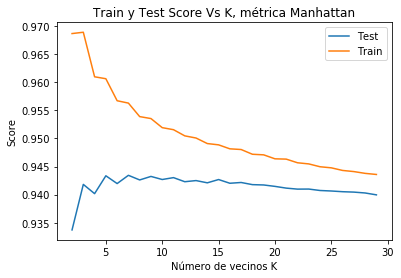

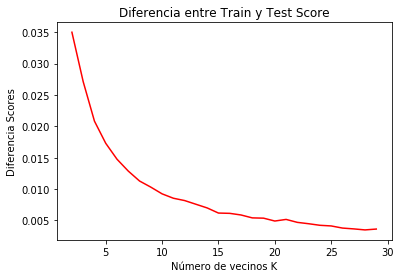

In [312]:
# plot lines
plt.plot(knn_r_acc_Manh['K'], knn_r_acc_Manh['Test Score'], label = "Test")
plt.plot(knn_r_acc_Manh['K'], knn_r_acc_Manh['Train Score'], label = "Train")
plt.legend()
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Score')
# giving a title to my graph
plt.title('Train y Test Score Vs K, métrica Manhattan')
plt.show()
# Difference
plt.plot(knn_r_acc_Manh['K'], knn_r_acc_Manh['Difference'], color='red')
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Diferencia Scores')
# giving a title to my graph
plt.title('Diferencia entre Train y Test Score')
plt.show()

In [313]:
knn_r_acc_Manh.nsmallest(2, 'Difference')

,Difference,K,Test Score,Train Score
26,0.003495,28.0,0.940288,0.943783
27,0.003632,29.0,0.939954,0.943586


# Euclidean

In [314]:
knn_r_acc_Euc = pd.DataFrame()
for i in range(2,30,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_trainScaled,y_train1Values)
    test_score = knn.score(X_testScaled,y_test1Values)
    train_score = knn.score(X_trainScaled,y_train1Values)
    difference=abs(train_score-test_score)
    df2 = {'K': i, 'Test Score': test_score, 'Train Score': train_score,'Difference': difference}
    knn_r_acc_Euc = knn_r_acc_Euc.append(df2, ignore_index = True)
#df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
(knn_r_acc_Euc)

,Difference,K,Test Score,Train Score
0,0.036007,2.0,0.931647,0.967654
1,0.028052,3.0,0.938956,0.967009
2,0.021603,4.0,0.937135,0.958738
3,0.018000,5.0,0.940091,0.958091
4,0.015091,6.0,0.938938,0.954029
5,0.013133,7.0,0.940306,0.953439
6,0.011361,8.0,0.939607,0.950968
7,0.010298,9.0,0.940145,0.950443
8,0.009402,10.0,0.939452,0.948854
9,0.008554,11.0,0.939619,0.948174


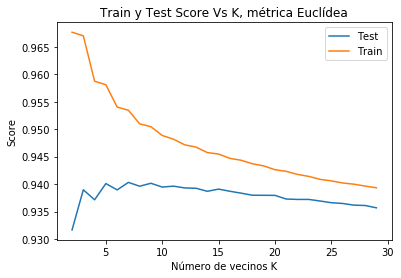

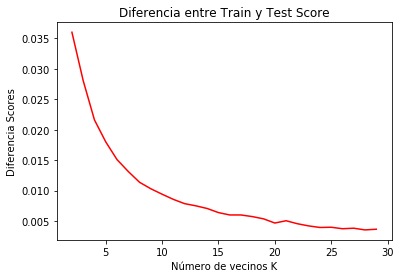

In [315]:
# plot lines
plt.plot(knn_r_acc_Euc['K'], knn_r_acc_Euc['Test Score'], label = "Test")
plt.plot(knn_r_acc_Euc['K'], knn_r_acc_Euc['Train Score'], label = "Train")
plt.legend()
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Score')
# giving a title to my graph
plt.title('Train y Test Score Vs K, métrica Euclídea')
plt.show()
# Difference
plt.plot(knn_r_acc_Euc['K'], knn_r_acc_Euc['Difference'], color='red')
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Diferencia Scores')
# giving a title to my graph
plt.title('Diferencia entre Train y Test Score')
plt.show()

# Chebyshev

In [316]:
knn_r_acc_Cheb = pd.DataFrame()
for i in range(2,30,1):
    knn = KNeighborsClassifier(n_neighbors=i, metric='chebyshev')
    knn.fit(X_trainScaled,y_train1Values)
    test_score = knn.score(X_testScaled,y_test1Values)
    train_score = knn.score(X_trainScaled,y_train1Values)
    difference=abs(train_score-test_score)
    df2 = {'K': i, 'Test Score': test_score, 'Train Score': train_score,'Difference': difference}
    knn_r_acc_Cheb = knn_r_acc_Cheb.append(df2, ignore_index = True)
#df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
(knn_r_acc_Cheb)

,Difference,K,Test Score,Train Score
0,0.036588,2.0,0.930435,0.967022
1,0.028105,3.0,0.937463,0.965568
2,0.021669,4.0,0.935827,0.957496
3,0.018239,5.0,0.938090,0.956330
4,0.015331,6.0,0.936956,0.952287
5,0.013069,7.0,0.938198,0.951267
6,0.011527,8.0,0.937457,0.948984
7,0.010362,9.0,0.938049,0.948411
8,0.009882,10.0,0.936884,0.946766
9,0.008662,11.0,0.937278,0.945940


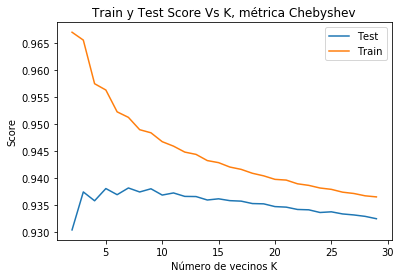

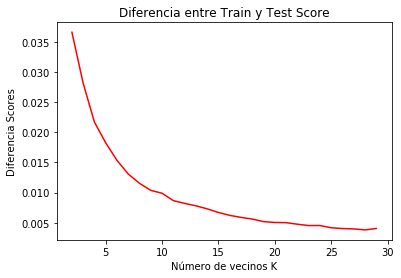

In [317]:
# plot lines
plt.plot(knn_r_acc_Cheb['K'], knn_r_acc_Cheb['Test Score'], label = "Test")
plt.plot(knn_r_acc_Cheb['K'], knn_r_acc_Cheb['Train Score'], label = "Train")
plt.legend()
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Score')
# giving a title to my graph
plt.title('Train y Test Score Vs K, métrica Chebyshev')
plt.show()
# Difference
plt.plot(knn_r_acc_Cheb['K'], knn_r_acc_Cheb['Difference'], color='red')
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Diferencia Scores')
# giving a title to my graph
plt.title('Diferencia entre Train y Test Score')
plt.show()

In [318]:
knn_r_acc_Manh.iloc[5:28,:]

,Difference,K,Test Score,Train Score
5,0.012866,7.0,0.943435,0.956301
6,0.011284,8.0,0.942611,0.953895
7,0.010309,9.0,0.943238,0.953547
8,0.009238,10.0,0.942689,0.951927
9,0.008541,11.0,0.943023,0.951564
10,0.008171,12.0,0.942295,0.950465
11,0.007583,13.0,0.942498,0.950080
12,0.006996,14.0,0.942098,0.949093
13,0.006181,15.0,0.942683,0.948863
14,0.006134,16.0,0.942020,0.948154


In [319]:
knn_r_acc_Euc.iloc[5:28,:]

,Difference,K,Test Score,Train Score
5,0.013133,7.0,0.940306,0.953439
6,0.011361,8.0,0.939607,0.950968
7,0.010298,9.0,0.940145,0.950443
8,0.009402,10.0,0.939452,0.948854
9,0.008554,11.0,0.939619,0.948174
10,0.007851,12.0,0.939291,0.947142
11,0.007494,13.0,0.939237,0.946731
12,0.007056,14.0,0.938682,0.945737
13,0.006384,15.0,0.939082,0.945465
14,0.005996,16.0,0.938688,0.944683


In [320]:
knn_r_acc_Cheb.iloc[5:28,:]

,Difference,K,Test Score,Train Score
5,0.013069,7.0,0.938198,0.951267
6,0.011527,8.0,0.937457,0.948984
7,0.010362,9.0,0.938049,0.948411
8,0.009882,10.0,0.936884,0.946766
9,0.008662,11.0,0.937278,0.945940
10,0.008201,12.0,0.936639,0.944840
11,0.007803,13.0,0.936609,0.944413
12,0.007299,14.0,0.935970,0.943269
13,0.006694,15.0,0.936191,0.942886
14,0.006219,16.0,0.935851,0.942070


Plot all Differences

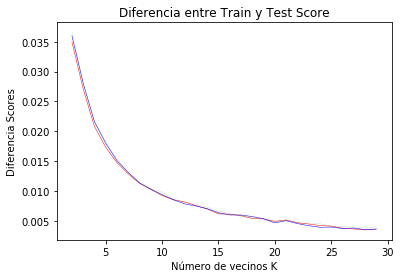

In [322]:
plt.plot(knn_r_acc_Manh['K'], knn_r_acc_Manh['Difference'], color='red',linewidth=0.5)
plt.plot(knn_r_acc_Euc['K'], knn_r_acc_Euc['Difference'], color='blue',linewidth=0.5)
plt.plot(knn_r_acc_Cheb['K'], knn_r_acc_Cheb['Difference'], color='green',linewidth=0.1)
plt.xlabel('Número de vecinos K')
# naming the y axis
plt.ylabel('Diferencia Scores')
# giving a title to my graph
plt.title('Diferencia entre Train y Test Score')
plt.show()

SAVE DATAFRAME Excel

In [325]:
knn_r_acc_Manh.to_excel("diff_Manh.xlsx")

In [326]:
knn_r_acc_Euc.to_excel("diff_Euc.xlsx")

In [324]:
knn_r_acc_Cheb.to_excel("diff_Cheb.xlsx")

**By Elbow Method the better K is 15 according the Difference between Test score and Train score.
Choose Manhattan, so it presents the minimun Difference**

# Confusion matrix KNN Manhattan k = 15

In [483]:
knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
knn.fit(X_trainScaled,y_train1Values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

**Prediction**

In [484]:
y_pred1=knn.predict(X_testScaled)

Accuracy

In [330]:
accuracy_score(y_test1Values, y_pred1)

0.9426827666105319

In [331]:
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[37355  3623    32]
 [ 3554 62566  1093]
 [   62  1234 57935]]
              precision    recall  f1-score   support

           1       0.91      0.91      0.91     41010
           2       0.93      0.93      0.93     67213
           3       0.98      0.98      0.98     59231

    accuracy                           0.94    167454
   macro avg       0.94      0.94      0.94    167454
weighted avg       0.94      0.94      0.94    167454



# Beta Distribution with simple KNN 

In [332]:
list1 = y_pred1.tolist()

In [333]:
X_test1['Prediction simple KNN']=list1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [334]:
X_test1.head()

,XC,YC,ZC,NSAMP,PASS,DISTNEAR,ESTVAR,BE,Prediction simple KNN
998952,129437.5,233153.65,3548.5,8.0,1.0,5.439274,0.122421,0.005227,1
530400,129178.5,232990.45,3337.5,9.0,3.0,16.625004,0.194217,0.004681,2
990056,129421.5,233198.65,2704.5,7.0,3.0,46.457063,0.316228,0.035884,2
812023,129327.5,233150.80,3081.5,9.0,3.0,23.531518,0.139876,0.007217,2
523103,129171.5,232959.35,2538.5,8.0,5.0,83.120639,39.317823,4.718547,3


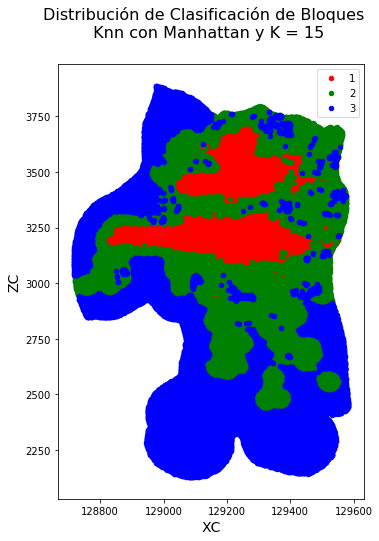

In [335]:
# Visualización de la Beta de la clasificación del KNN común
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction simple KNN')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques \n Knn con Manhattan y K = 15", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
#save_results_to = 'E:/Data2/3.Projects/150_ML_For_Resource_Classification/Images/'
#plt.savefig(save_results_to + 'veta100_a.png', dpi = 300)
plt.show()

Plot without Title

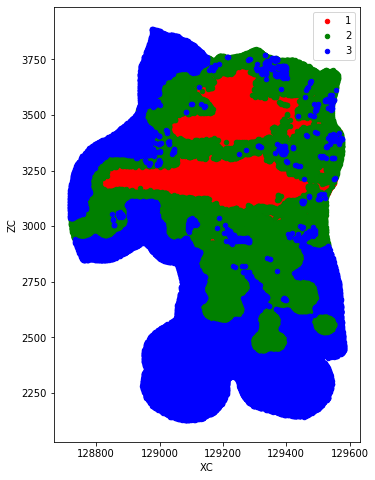

In [336]:
fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction simple KNN')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])

#save_results_to = 'E:/Data2/3.Projects/150_ML_For_Resource_Classification/Images/'
#plt.savefig(save_results_to + 'veta100_a.png', dpi = 300)
plt.show()

# Croos Valid

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [ ]:
#index += ["K-NN"]
knn = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
scores = cross_val_score(knn, (X.iloc[:,3:8]).values, Y.values, cv=5)
scores

array([0.85604883, 0.8685854 , 0.90047237, 0.86188388, 0.85073092])

# Decision Tree

In [407]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [414]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_trainScaled, y_train1Values)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

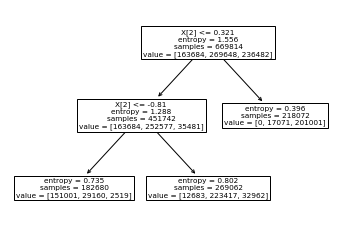

In [413]:
tree.plot_tree(clf)
plt.show()

# Split in two New DataSets

In [497]:
X_train1Df=pd.DataFrame(X_trainScaled)
X_train1Df['Class']=y_train1Values

X_Test1Df=pd.DataFrame(X_testScaled)

In [498]:
X_train1Df.head()

,0,1,2,3,4,Class
0,-0.149465,0.989976,0.385890,0.398037,0.269060,3
1,-0.149465,0.989976,-0.469955,1.756139,0.979677,2
2,1.524189,-0.413566,0.233129,-0.341536,-0.212172,3
3,-0.986293,-0.413566,-0.770117,-0.341332,-0.211478,2
4,-0.986293,-0.413566,-0.448850,-0.341616,-0.211710,2


**Df Left N1**

In [499]:
DfLeftN1=X_train1Df[X_train1Df.iloc[:,2]<=0.333]

**Df Right N1**

In [500]:
DfRightN1=X_train1Df[X_train1Df.iloc[:,2]>0.333]

**Df Left N2**

In [501]:
DfLeftN2=DfLeftN1[DfLeftN1.iloc[:,1]<=-0.765]

**Df Right N2**

In [502]:
DfRightN2=DfLeftN1[DfLeftN1.iloc[:,1]>-0.765]

**Train Right N1**

In [503]:
trainRight = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
trainRight.fit(DfRightN1.iloc[:, :-1].values, DfRightN1.iloc[:, 5].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

**Train Left N2**

In [504]:
trainLeftN2 = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
trainLeftN2.fit(DfLeftN2.iloc[:, :-1].values, DfLeftN2.iloc[:, 5].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

**Train Right N2**

In [505]:
trainRightN2 = KNeighborsClassifier(n_neighbors=15, metric='manhattan')
trainRightN2.fit(DfRightN2.iloc[:, :-1].values, DfRightN2.iloc[:, 5].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

# *Assemble Decision Tree and Kn, K = 9 and Metric Manhattan*

In [481]:
y_predComb=[]
for i in range (0,len(X_test1),1):
  if X_Test1Df.iloc[i,2]>0.333:
    model=trainRight
  else:
    if X_Test1Df.iloc[i,1]<=-0.765:
      model=trainLeftN2
    else:
      model=trainRightN2


  y_predComb.append(model.predict(X_Test1Df.iloc[[i]].values))

In [482]:
y_predCombDf=pd.DataFrame(y_predComb)

# Confusion matrixs: DT-Knn ; Knn with Manhattan

In [359]:
print("Matrix Confusion DT-KNN \n", (confusion_matrix(y_test1Values, y_predCombDf.iloc[:,:].values)))
print(classification_report(y_test1Values, y_predCombDf.iloc[:,:].values,digits=5),"\n")

print(confusion_matrix(y_test1Values, y_pred1))
print("Matrix Confusion simple KNN \n", (classification_report(y_test1Values, y_pred1,digits=5)))

Matrix Confusion DT-KNN 
 [[37355  3623    32]
 [ 3554 62536  1123]
 [   62  1250 57919]]
              precision    recall  f1-score   support

           1    0.91174   0.91088   0.91131     41010
           2    0.92771   0.93042   0.92906     67213
           3    0.98045   0.97785   0.97915     59231

    accuracy                        0.94241    167454
   macro avg    0.93997   0.93971   0.93984    167454
weighted avg    0.94245   0.94241   0.94243    167454
 

[[37355  3623    32]
 [ 3554 62566  1093]
 [   62  1234 57935]]
Matrix Confusion simple KNN 
               precision    recall  f1-score   support

           1    0.91174   0.91088   0.91131     41010
           2    0.92796   0.93086   0.92941     67213
           3    0.98095   0.97812   0.97953     59231

    accuracy                        0.94268    167454
   macro avg    0.94022   0.93995   0.94008    167454
weighted avg    0.94273   0.94268   0.94271    167454



Save Confusion matrix DT-Knn and Knn

In [350]:
(pd.DataFrame(confusion_matrix(y_test1Values, y_predCombDf.iloc[:,:].values))).to_excel("Matriz_Con_Comb.xlsx")

In [351]:
(pd.DataFrame(confusion_matrix(y_test1Values, y_pred1))).to_excel("Matriz_Con_KNN.xlsx")

# Beta Distr DT and KNN

In [389]:
list2 =( y_predCombDf.iloc[:,0].values).tolist()

In [390]:
X_test1['Prediction DT and KNN']=list2

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [280]:
X_test1.head()

,XC,YC,ZC,NSAMP,PASS,DISTNEAR,ESTVAR,BE,Prediction simple KNN,Prediction DT and KNN
1157107,129525.5,233283.05,2750.5,8.0,5.0,94.189694,27.541485,4.373223,3,3
128227,128940.5,232768.00,3711.5,8.0,5.0,150.411158,5.267889,3.849739,3,3
379605,129099.5,232930.95,3004.5,8.0,5.0,71.594121,293.068241,10.845566,2,2
266514,129032.5,232864.95,2541.5,8.0,5.0,130.486286,39.780765,4.993167,3,3
223039,129001.5,232861.65,2221.5,3.0,5.0,104.162723,1.053215,0.608465,3,3


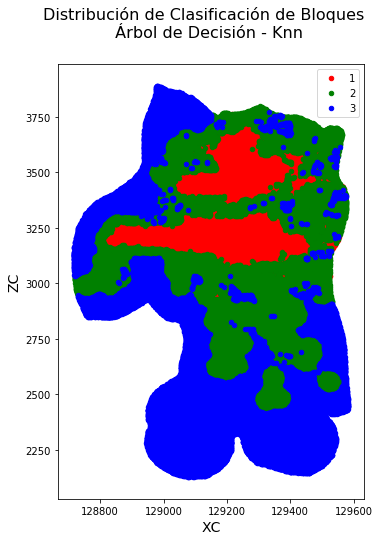

In [281]:
# Visualización de la Beta de la clasificación del KNN común
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction DT and KNN')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques \n Árbol de Decisión - Knn", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
#save_results_to = 'E:/Data2/3.Projects/150_ML_For_Resource_Classification/Images/'
#plt.savefig(save_results_to + 'veta100_a.png', dpi = 300)
plt.show()

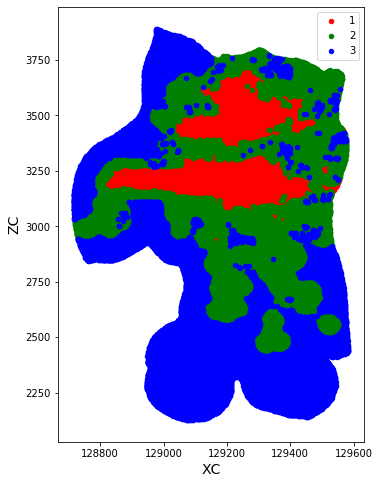

In [391]:
fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test1.groupby('Prediction DT and KNN')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])

plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
#save_results_to = 'E:/Data2/3.Projects/150_ML_For_Resource_Classification/Images/'
#plt.savefig(save_results_to + 'veta100_a.png', dpi = 300)
plt.show()

# Normas para la diferencia de matrices de Confusion entre KNN simple y DT-KNN

Resta

In [485]:
resta=confusion_matrix(y_test1Values, y_pred1)-confusion_matrix(y_test1Values, y_predCombDf.iloc[:,:].values)

In [486]:
from numpy import linalg

Normas

In [487]:
print("Frobenius \n",linalg.norm(resta,ord='fro'))
print("1 \n",linalg.norm(resta,ord=1))
print("2 \n",linalg.norm(resta,ord=2))
print("Infinito \n",linalg.norm(resta,ord=np.inf))

Frobenius 
 40.8166632639171
1 
 35.0
2 
 40.8166632639171
Infinito 
 56.0


In [398]:
sklearn.__version__

'0.21.2'

# Test del modelo combinado con el 30% final

In [506]:
X_Test30Df=pd.DataFrame(X_test30_Scaled)

In [507]:
y_predComb=[]
for i in range (0,len(X_test),1):
  if X_Test30Df.iloc[i,2]>0.333:
    model=trainRight
  else:
    if X_Test30Df.iloc[i,1]<=-0.765:
      model=trainLeftN2
    else:
      model=trainRightN2


  y_predComb.append(model.predict(X_Test30Df.iloc[[i]].values))

In [508]:
y_pred_30_CombDf=pd.DataFrame(y_predComb)

## Confusion Matrix

In [476]:
print("Matrix Confusion DT-KNN \n", (confusion_matrix(y_testValues, y_pred_30_CombDf.iloc[:,:].values)))
print(classification_report(y_testValues, y_pred_30_CombDf.iloc[:,:].values,digits=5),"\n")

Matrix Confusion DT-KNN 
 [[ 77153  10614     55]
 [  6902 134854   2437]
 [    87   3647 123081]]
              precision    recall  f1-score   support

           1    0.91694   0.87852   0.89732     87822
           2    0.90436   0.93523   0.91954    144193
           3    0.98015   0.97056   0.97533    126815

    accuracy                        0.93383    358830
   macro avg    0.93382   0.92810   0.93073    358830
weighted avg    0.93423   0.93383   0.93382    358830
 



# Veta Distribution

In [509]:
listFinal =(y_pred_30_CombDf.iloc[:,0].values).tolist()

In [510]:
X_test['Prediction 30% DT and KNN']=listFinal

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [479]:
X_test.head()

,XC,YC,ZC,NSAMP,PASS,DISTNEAR,ESTVAR,BE,Prediction 30% DT and KNN
8885,128744.5,232538.95,3088.5,8.0,5.0,89.329551,133.957553,8.297304,3
874706,129361.5,233138.10,2279.5,4.0,3.0,40.787332,0.460864,0.102178,3
437224,129128.5,232960.70,2293.5,6.0,5.0,46.063407,8.385747,2.592712,3
349733,129084.5,232898.35,2706.5,8.0,5.0,126.108212,36.196350,3.197180,3
447807,129138.5,232938.20,2652.5,11.0,3.0,50.353784,0.340715,0.013748,2


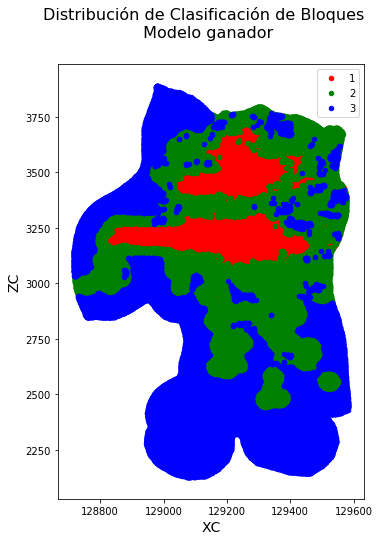

In [480]:
# Visualización de la Beta de la clasificación del modelo ganador
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test.groupby('Prediction 30% DT and KNN')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])
plt.suptitle("Distribución de Clasificación de Bloques \n Modelo ganador", fontsize=16)
plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
#save_results_to = 'E:/Data2/3.Projects/150_ML_For_Resource_Classification/Images/'
#plt.savefig(save_results_to + 'veta100_a.png', dpi = 300)
plt.show()

# Veta Distribution Without Title

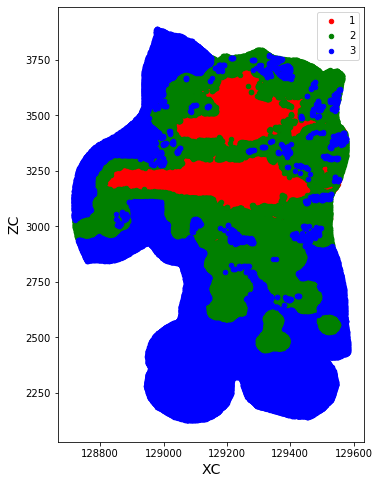

In [511]:
# Visualización de la Beta de la clasificación del modelo ganador sin título
#====================================================================================

fig, ax = plt.subplots(figsize = (5.5, 8))
colors = {1:'red', 2:'green', 3:'blue'}
grouped = X_test.groupby('Prediction 30% DT and KNN')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='XC', y='ZC', label=key, color=colors[key])

plt.xlabel('XC', fontsize=14)
plt.ylabel('ZC', fontsize=14)
#save_results_to = 'E:/Data2/3.Projects/150_ML_For_Resource_Classification/Images/'
#plt.savefig(save_results_to + 'veta100_a.png', dpi = 300)
plt.show()